In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# basic generators!!!

def generate_multivariate_normal(size):
    mean = torch.tensor([1.0, 2.0])
    cov = torch.tensor([[2.0, 0.5], [0.5, 1.0]])
    A = torch.linalg.cholesky(cov)
    z = torch.randn(*size, 2)
    samples = mean + z @ A.T
    return samples

def generate_normal(size):
    return torch.normal(mean=0, std=1e-7, size=size)

def generate_unif(size):
    return torch.rand(size=size)

def generate_Cauchy(size):
    cauchy = torch.distributions.Cauchy(loc=0.0, scale=100.0)
    tensor = cauchy.sample(size)
    return tensor

def generate_dirichlet(size):
    alpha = torch.tensor([0.5, 0.5, 0.5])
    dirichlet = torch.distributions.Dirichlet(alpha)
    tensor = dirichlet.sample(size)
    return tensor

def generate_Beta(size):
    beta = torch.distributions.Beta(concentration0=0.5, concentration1=0.5)
    tensor = beta.sample(size)
    return tensor

def generate_poisson(size):
    rates = torch.full(size, 4.0)
    tensor = torch.poisson(rates)
    return tensor

def generate_LogNormal(size):
    lognormal = torch.distributions.LogNormal(loc=0.0, scale=1.0)
    tensor = lognormal.sample(size)
    return tensor


def generate_Gamma(size):
    gamma = torch.distributions.Gamma(concentration=2.0, rate=2.0)
    tensor = gamma.sample(size)
    return tensor


def generate_Exponential(size):
    exponential = torch.distributions.Exponential(rate=1.0)
    tensor = exponential.sample(size)
    return tensor


list_distr = {
    generate_multivariate_normal: 'DNormal',
    generate_normal: 'Normal',
    generate_unif: 'Unif',
    generate_Cauchy: 'Cauchy',
    generate_dirichlet: 'Dirichlet',
    generate_Beta: 'Beta',
    generate_poisson: 'Poisson',
    generate_LogNormal: 'LogNormal',
    generate_Gamma: 'Gamma',
    generate_Exponential: 'Exponential'
}

In [3]:
def plot_hist(tensor, name):
    input_np = tensor.numpy().flatten()
    plt.figure(figsize=(10, 6))
    plt.hist(input_np, bins=100, color='blue', alpha=0.7, edgecolor='black')
    plt.title(name)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

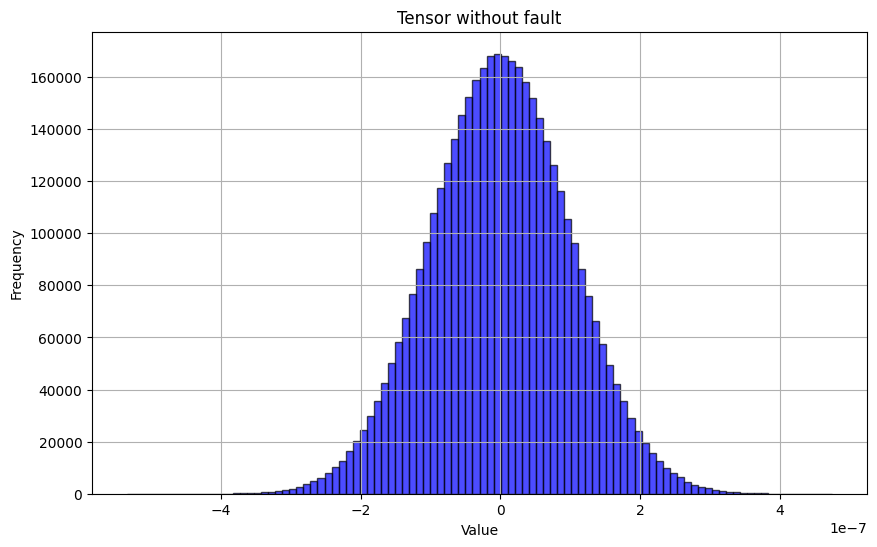

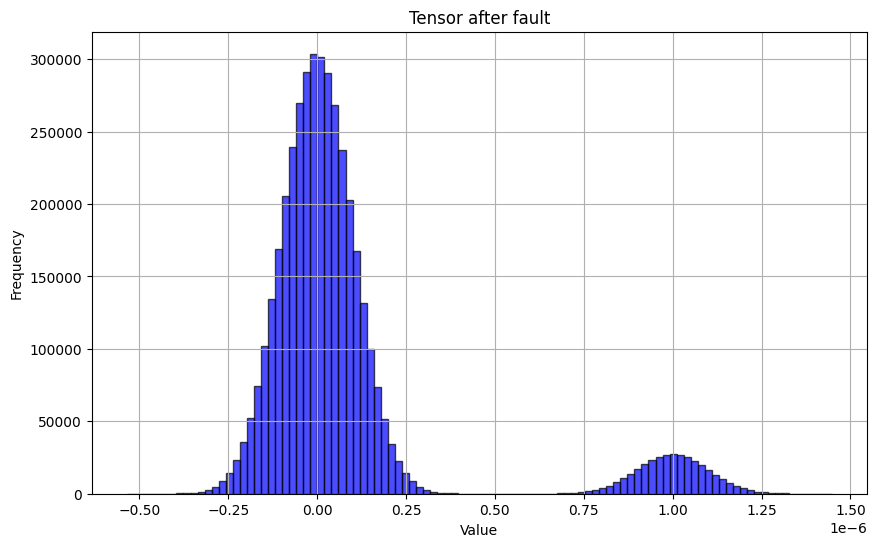

In [15]:
def make_fault(input, numFaults, fault_value):
    output = input.clone()
    for _ in range(numFaults):
        x, y = torch.randint(0, input.shape[0], size=(1,)).item(), torch.randint(0, input.shape[0], size=(1,)).item()
        output[x,y] = torch.normal(mean=fault_value, std=1e-7, size=(1,)).item()
        # input[x,y] = fault_value
    return output

size = (1024, 4096)
rate = 0.1
fault_value = 1e-6
numFaults = int(size[0] * size[1] * rate)
input_no_fault = generate_normal(size)
plot_hist(input_no_fault, "Tensor without fault")
input_fault = make_fault(input_no_fault, numFaults, fault_value)
plot_hist(input_fault, "Tensor after fault")

3072


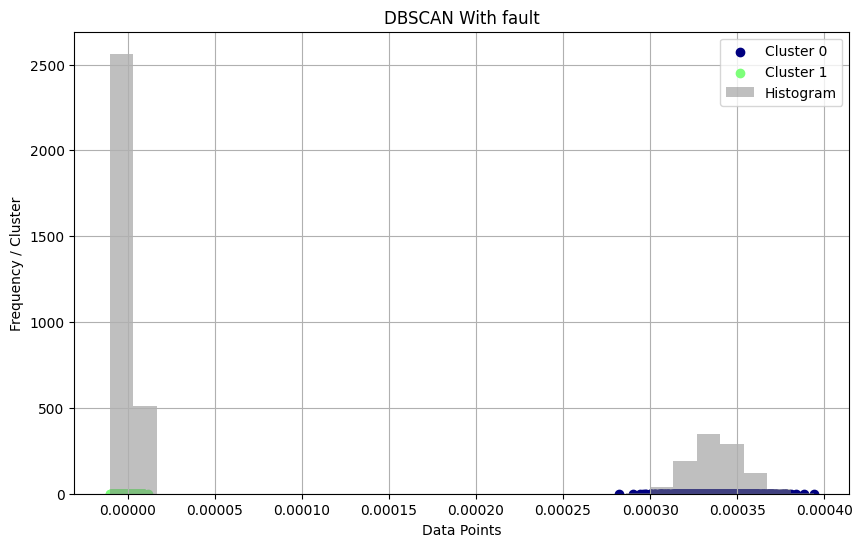

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Генерация данных
# np.random.seed(42)
# data = np.concatenate([
#     np.random.normal(0, 1, 50),  # Кластер 1
#     np.random.normal(10, 1, 50)  # Кластер 3
# ])
# data = input_no_fault.sum(0).flatten().numpy()
data = input_fault.sum(0).flatten().numpy()

# Преобразование в нужный формат
X = data.reshape(-1, 1)

# Применение DBSCAN
eps = 1e-5
min_samples = 2
clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
labels = clustering.labels_
print(sum(labels))
# Визуализация результатов
plt.figure(figsize=(10, 6))

# Линия с кластерами
for label in np.unique(labels):
    if label == -1:
        color = 'k'  # Черный для шума
    else:
        color = plt.cm.jet(label / np.max(labels + 1))
    plt.scatter(data[labels == label], [0] * np.sum(labels == label), color=color, label=f'Cluster {label}')

# Гистограмма распределения
plt.hist(data, bins=30, alpha=0.5, color='gray', label='Histogram')

plt.title("DBSCAN With fault")
plt.xlabel("Data Points")
plt.ylabel("Frequency / Cluster")
plt.legend()
plt.grid(True)
plt.show()


<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_44698/2924183712.py:25: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel('$\epsilon$')
/tmp/ipykernel_44698/2924183712.py:26: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sigma$')


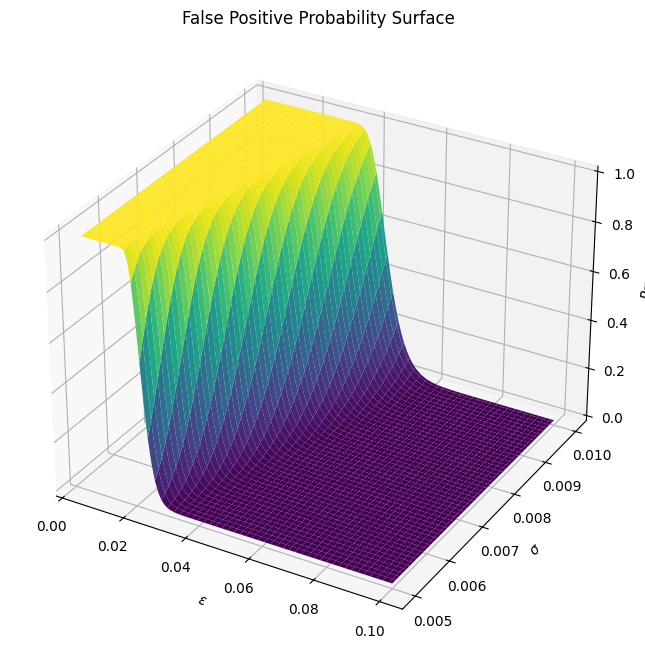

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
N = 1024  # Fixed value

# Define ranges for epsilon and sigma
epsilon = np.linspace(0.005, 0.1, 100)  # Range for epsilon
sigma = np.linspace(0.005, 0.01, 100)  # Range for sigma

# Create meshgrid for plotting
E, S = np.meshgrid(epsilon, sigma)

# Calculate P_FP
Phi = norm.cdf(E / (np.sqrt(2) * S))  # CDF of normal distribution
P_FP = 1 - np.exp(-(N - 1) * (1 - Phi))

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(E, S, P_FP, cmap='viridis')

# Labels
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$P_{FP}$')
ax.set_title('False Positive Probability Surface')

plt.show()